In [1]:
from pyanitools import anidataloader
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import math
from torch.optim import SGD, Adam

from sklearn.model_selection import KFold
import random
from tqdm import tqdm

# Many-body tensor representation (MBTR)

### After a trial run with ani file s01, I've started unpacking four ANI files and creating representations for each atom. I am not done and will continue to work on this throughout the week. Because of the way ASE wants me to create atoms, I think I have to do this manually for each one. If you know a more efficient way to get this done please let me know!

In [2]:
# FIRST HDF5 FILE
hdf5file = 'ani_gdb_s01.h5'

# construct the data loader class
ad1 = anidataloader(hdf5file)

coords_list01 = []
energies_list01 = []
# print the species of the data set one by one
for data in ad1:
#     print(data.keys())

    # extract the data
    P = data['path']
    X = data['coordinates']
    E = data['energies']
    S = data['species']
    sm = data['smiles']

    # print the data
    #print("Path:   ", P)
    #print("  Smiles:      ","".join(sm))
    print("  Symbols:     ", S)
    #print("  Coordinates: ", X.shape)
    coords_list01.append(X)
    print("  Energies:    ", E.shape, "\n")
    energies_list01.append(E)

# closes the H5 data file
ad1.cleanup()

  Symbols:      ['C', 'H', 'H', 'H', 'H']
  Energies:     (5400,) 

  Symbols:      ['N', 'H', 'H', 'H']
  Energies:     (3600,) 

  Symbols:      ['O', 'H', 'H']
  Energies:     (1800,) 



In [3]:
# SECOND HD5 FILE
hdf5file = 'ani_gdb_s02.h5'

# construct the data loader class
ad1 = anidataloader(hdf5file)

coords_list02 = []
energies_list02 = []
# print the species of the data set one by one
for data in ad1:
#     print(data.keys())

    # extract the data
    P = data['path']
    X = data['coordinates']
    E = data['energies']
    S = data['species']
    sm = data['smiles']

    # print the data
    #print("Path:   ", P)
    #print("  Smiles:      ","".join(sm))
    print("  Symbols:     ", S)
    #print("  Coordinates: ", X.shape)
    coords_list02.append(X)
    print("  Energies:    ", E.shape, "\n")
    energies_list02.append(E)

# closes the H5 data file
ad1.cleanup()

  Symbols:      ['C', 'C', 'H', 'H', 'H', 'H', 'H', 'H']
  Energies:     (8469,) 

  Symbols:      ['C', 'N', 'H', 'H', 'H', 'H', 'H']
  Energies:     (7084,) 

  Symbols:      ['N', 'N']
  Energies:     (480,) 

  Symbols:      ['O', 'N', 'H', 'H', 'H']
  Energies:     (4320,) 

  Symbols:      ['O', 'N', 'H']
  Energies:     (1440,) 

  Symbols:      ['C', 'O', 'H', 'H', 'H', 'H']
  Energies:     (5760,) 

  Symbols:      ['C', 'C', 'H', 'H', 'H', 'H']
  Energies:     (5760,) 

  Symbols:      ['C', 'O', 'H', 'H']
  Energies:     (2880,) 

  Symbols:      ['O', 'O']
  Energies:     (480,) 

  Symbols:      ['O', 'O', 'H', 'H']
  Energies:     (2819,) 

  Symbols:      ['C', 'C', 'H', 'H']
  Energies:     (2880,) 

  Symbols:      ['N', 'N', 'H', 'H', 'H', 'H']
  Energies:     (5710,) 

  Symbols:      ['N', 'N', 'H', 'H']
  Energies:     (2880,) 



In [4]:
# THIRD HD5 FILE
hdf5file = 'ani_gdb_s03.h5'

# construct the data loader class
ad1 = anidataloader(hdf5file)

coords_list03 = []
energies_list03 = []
# print the species of the data set one by one
for data in ad1:
#     print(data.keys())

    # extract the data
    P = data['path']
    X = data['coordinates']
    E = data['energies']
    S = data['species']
    sm = data['smiles']

    # print the data
    #print("Path:   ", P)
    #print("  Smiles:      ","".join(sm))
    print("  Symbols:     ", S)
    #print("  Coordinates: ", X.shape)
    coords_list03.append(X)
    print("  Energies:    ", E.shape, "\n")
    energies_list03.append(E)

# closes the H5 data file
ad1.cleanup()

  Symbols:      ['C', 'C', 'C', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H']
  Energies:     (12960,) 

  Symbols:      ['C', 'C', 'N', 'H', 'H', 'H', 'H', 'H', 'H', 'H']
  Energies:     (11520,) 

  Symbols:      ['N', 'C', 'O', 'H', 'H', 'H']
  Energies:     (5760,) 

  Symbols:      ['O', 'C', 'O', 'H', 'H']
  Energies:     (4320,) 

  Symbols:      ['N', 'N', 'C', 'H', 'H', 'H', 'H']
  Energies:     (7200,) 

  Symbols:      ['O', 'N', 'C', 'H', 'H', 'H']
  Energies:     (5760,) 

  Symbols:      ['C', 'C', 'C', 'H', 'H', 'H', 'H']
  Energies:     (7200,) 

  Symbols:      ['C', 'C', 'C', 'H', 'H', 'H', 'H', 'H', 'H']
  Energies:     (10080,) 

  Symbols:      ['C', 'C', 'N', 'H', 'H', 'H', 'H', 'H']
  Energies:     (8640,) 

  Symbols:      ['C', 'C', 'O', 'H', 'H', 'H', 'H']
  Energies:     (7200,) 

  Symbols:      ['O', 'N', 'O', 'H']
  Energies:     (2880,) 

  Symbols:      ['O', 'O', 'O', 'H', 'H']
  Energies:     (4320,) 

  Symbols:      ['C', 'C', 'O', 'H', 'H', 'H', 'H', 'H',

In [23]:
# FOURTH HDF5 FILE
hdf5file = 'ani_gdb_s04.h5'

# construct the data loader class
ad1 = anidataloader(hdf5file)

coords_list04 = []
energies_list04 = []
# print the species of the data set one by one
for data in ad1:
#     print(data.keys())

    # extract the data
    P = data['path']
    X = data['coordinates']
    E = data['energies']
    S = data['species']
    sm = data['smiles']

    # print the data
    #print("Path:   ", P)
    #print("  Smiles:      ","".join(sm))
    print("  Symbols:     ", S)
    #print("  Coordinates: ", X)
    coords_list04.append(X)
    print("  Energies:    ", E.shape, "\n")
    energies_list04.append(E)

# closes the H5 data file
ad1.cleanup()

  Symbols:      ['C', 'C', 'C', 'N', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H']
  Energies:     (15840,) 

  Symbols:      ['C', 'C', 'C', 'O', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H']
  Energies:     (14400,) 

  Symbols:      ['O', 'C', 'O', 'O', 'H', 'H']
  Energies:     (5760,) 

  Symbols:      ['C', 'C', 'C', 'C', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H']
  Energies:     (17280,) 

  Symbols:      ['C', 'C', 'C', 'N', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H']
  Energies:     (15840,) 

  Symbols:      ['C', 'C', 'C', 'O', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H']
  Energies:     (14400,) 

  Symbols:      ['N', 'C', 'C', 'N', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H']
  Energies:     (14400,) 

  Symbols:      ['N', 'C', 'C', 'O', 'H', 'H', 'H', 'H', 'H', 'H', 'H']
  Energies:     (12960,) 

  Symbols:      ['O', 'C', 'C', 'O', 'H', 'H', 'H', 'H', 'H', 'H']
  Energies:     (11520,) 

  Symbols:      ['C', 'C', 'N', 'C', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H']
  Energi

### Get arrays of coordinates and energies for each compound. In the cell below I make separate coordinate lists for each compound. I could just loop through and get them that way, but if I do that I won't know which is which for the step where I create the atom representations.

In [32]:
# GET ARRAY OF COORDINATES FOR EACH COMPOUND
# S01
CH4_coords_list = coords_list01[0]
NH3_coords_list = coords_list01[1]
H2O_coords_list = coords_list01[2]
# S02
C2H6_coords_list = coords_list02[0]
CH3NH2_coords_list = coords_list02[1]
N2_coords_list = coords_list02[2]
NH3O_coords_list = coords_list02[3]
NHO_coords_list = coords_list02[4]
CH3OH_coords_list = coords_list02[5]
C2H4_coords_list = coords_list02[6]
CH2O_coords_list = coords_list02[7]
O2_coords_list = coords_list02[8]
H2O2_coords_list = coords_list02[9]
C2H2_coords_list = coords_list02[10]
N2H4_coords_list = coords_list02[11]
H2N2_coords_list = coords_list02[12]
# S03
C3H8_coords_list = coords_list03[0]
CH3_2_NH_coords_list = coords_list03[1]
H3NCO_coords_list = coords_list03[2]
H2CO2_coords_list = coords_list03[3]
N2CH4_coords_list = coords_list03[4]
ONCH3_coords_list = coords_list03[5]
C3H4_coords_list = coords_list03[6]
C3H6_coords_list = coords_list03[7]
CCNH3_coords_list = coords_list03[8]
C2OH4_coords_list = coords_list03[9]
ONOH_coords_list = coords_list03[10]
H2O3_coords_list = coords_list03[11]
C2H6O_coords_list = coords_list03[12]
C2NH7_coords_list = coords_list03[13]
C2OH6_coords_list = coords_list03[14]
C3H6_coords_list2 = coords_list03[15]
C2OH4_coords_list2 = coords_list03[16]
CO2_coords_list = coords_list03[17]
C2NH3_coords_list = coords_list03[18]
CN2H4_coords_list = coords_list03[19]
# S04
C3NH9_coords_list = coords_list04[0]
C3OH8_coords_list = coords_list04[1]
O3CH2_coords_list = coords_list04[2]
C4H10_coords_list = coords_list04[3]
C3NH9_coords_list2 = coords_list04[4]
C3OH8_coords_list2 = coords_list04[5]
N2C2H8_coords_list = coords_list04[6]
NC2OH7_coords_list = coords_list04[7]
O2C2H6_coords_list = coords_list04[8]
C3NH9_coords_list3 = coords_list04[9]
C3OH8_coords_list3 = coords_list04[10]
C4H8_coords_list = coords_list04[11]
C3NH9_coords_list4 = coords_list04[12]
C3OH6_coords_list = coords_list04[13]
C3NH5_coords_list = coords_list04[14]
NC3H7_coords_list = coords_list04[15]
OC3H6_coords_list = coords_list04[16]
O2C2H4_coords_list = coords_list04[17]
OC2NH3_coords_list = coords_list04[18]
C2N2H6_coords_list = coords_list04[19]
C2NOH5_coords_list = coords_list04[20]
N3CH5_coords_list = coords_list04[22]
N2COH4_coords_list = coords_list04[22]
C4H8_coords_list2 = coords_list04[23]
ON2CH4_coords_list = coords_list04[24]
O2NCH3_coords_list = coords_list04[25]
C2N2H6_coords_list = coords_list04[26]
C3OH6_coords_list2 = coords_list04[27]
C2O2H4_coords_list = coords_list04[28]
C2ONH5_coords_list = coords_list04[29]
C4H6_coords_list = coords_list04[30]
NC3H5_coords_list = coords_list04[31]
OC3H4_coords_list = coords_list04[32]
C4H6_coords_list2 = coords_list04[33]
C3OH6_coords_list3 = coords_list04[34]
C3OH4_coords_list = coords_list04[35]
C3NH3_coords_list = coords_list04[36]
O2C2H2_coords_list = coords_list04[37]
OC2NH3_coords_list = coords_list04[38]
N2C2H8_coords_list = coords_list04[39]
C2N2H4_coords_list = coords_list04[40]
C4H4_coords_list = coords_list04[41]
OC3H2_coords_list = coords_list04[42]
C3NH_coords_list2 = coords_list04[43]
C4H2_coords_list = coords_list04[44]
C2N2H6_coords_list2 = coords_list04[45]
C2N2H6_coords_list3 = coords_list04[46]
C2NOH5_coords_list2 = coords_list04[47]
C4H8_coords_list3 = coords_list04[48]
NC3H7_coords_list2 = coords_list04[49]
OC3H6_coords_list2 = coords_list04[50]
C3NH7_coords_list = coords_list04[51]
C3OH6_coords_list4 = coords_list04[52]
C3NH7_coords_list2 = coords_list04[53]
C2NOH5_coords_list3 = coords_list04[54]
C4H8_coords_list4 = coords_list04[55]
C3NH7_coords_list3 = coords_list04[56]
C3OH6_coords_list4 = coords_list04[57]
C2O2H4_coords_list2 = coords_list04[58]
N3CH5_coords_list2 = coords_list04[59]
N2COH4_coords_list2 = coords_list04[60]

# S05

### I initially created a list of energies, but it gave me some trouble when trying to permute the energies and run the training fold. I tried converting to an array but got this error:

In [120]:
# ALL ENERGIES TOGETHER
all_energies = energies_list01 + energies_list02
all_energies_array = np.array(all_energies)

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (16,) + inhomogeneous part.

### This error doesn't make sense to me since all energies have the same dimensions (one).

### In the meantime, I have split up each energy list and them put them back together. This feels much longer than it needs to be, but this allows me to have all_energies as an array and use it in my model.

In [12]:

# GET ARRAYS OF ENERGIES FOR EACH COMPOUND
# SO1
CH4_energies = energies_list01[0]
NH3_energies = energies_list01[1]
H2O_energies = energies_list01[2]
# SO2
C2H6_energies = energies_list02[0]
CH3NH2_energies = energies_list02[1]
N2_energies = energies_list02[2]
NH3O_energies = energies_list02[3]
NHO_energies = energies_list02[4]
CH3OH_energies = energies_list02[5]
C2H4_energies = energies_list02[6]
CH2O_energies = energies_list02[7]
O2_energies = energies_list02[8]
H2O2_energies = energies_list02[9]
C2H2_energies = energies_list02[10]
N2H4_energies = energies_list02[11]
H2N2_energies = energies_list02[12]
# S03
C3H8_energies = energies_list03[0]
CH3_2_NH_energies = energies_list03[1]
H3NCO_energies = energies_list03[2]
H2CO2_energies = energies_list03[3]
N2CH4_energies = energies_list03[4]
ONCH3_energies = energies_list03[5]
C3H4_energies = energies_list03[6]
C3H6_energies = energies_list03[7]
CCNH3_energies = energies_list03[8]
C2OH4_energies = energies_list03[9]
ONOH_energies = energies_list03[10]
H2O3_energies = energies_list03[11]
C2H6O_energies = energies_list03[12]
C2NH7_energies = energies_list03[13]
C2OH6_energies = energies_list03[14]
C3H6_energies = energies_list03[15]
CO2_energies = energies_list03[17] # ignore duplicate C2OH4 at index 16
C2NH3_energies = energies_list03[18]
CN2H4_energies = energies_list03[19]
# S04



# energies from 01, use for mini runs
mini_energies =np.hstack((CH4_energies, NH3_energies, H2O_energies))

all_energies_arr = np.hstack((CH4_energies, NH3_energies, H2O_energies, #end S01
                         C2H6_energies, CH3NH2_energies, N2_energies, NH3O_energies, 
                         NHO_energies, CH3OH_energies, C2H4_energies, CH2O_energies, 
                         O2_energies, H2O2_energies, C2H2_energies, N2H4_energies, H2N2_energies)) #end S02

type(mini_energies)

numpy.ndarray

Instantiate MBTR with parameters. I will look over the documentation and play with paarameters to improve my model.

In [8]:
from dscribe.descriptors import MBTR

# INSTANTIATE MBTR. Comments here are from documentation
mbtr = MBTR(
    species=['H', 'C', 'O', 'N'],
   # "Notice that [species] is not the atomic numbers that are present for an individual system,
   # but should contain all the elements that are ever going to be encountered when creating
   # the descriptors for a set of systems."
    geometry = {"function": "distance"}, # pairwise distance in angstroms
    grid = {"min": 0, "max": 1, "n": 100, "sigma": 0.1}, # grid on which functions are computed
    weighting = {"function": "unity", "scale": 0.5, "threshold": 1e-3}, # using unity (no weighting) for now just for dry run
    periodic = False,
    normalization = "none", # none, l2, num_atoms or valle_oganov
)

Create ASE Atoms of each compund.

In [9]:
# CREATE ASE ATOMS FOR EACH COMPOUND
from ase import Atoms

# S01
CH4_atoms = []
for i, CH4_coords in enumerate(CH4_coords_list):
    CH4_coord = Atoms(
        symbols = ["C", "H", "H", "H", "H"],
        positions = CH4_coords
    )
    CH4_atoms.append(CH4_coord)

NH3_atoms = []
for i, NH3_coords in enumerate(NH3_coords_list):
    NH3_coord = Atoms(
        symbols = ["N", "H", "H", "H"],
        positions = NH3_coords
    )
    NH3_atoms.append(NH3_coord)

H2O_atoms = []
for i, H2O_coords in enumerate(H2O_coords_list):
    H2O_coord = Atoms(
        symbols = ["O", "H", "H"],
        positions = H2O_coords
    )
    H2O_atoms.append(H2O_coord)

# S02
C2H6_atoms = []
for i, C2H6_coords in enumerate(C2H6_coords_list):
    C2H6_coord = Atoms(
        symbols = ['C', 'C', 'H', 'H', 'H', 'H', 'H', 'H'],
        positions = C2H6_coords)
    C2H6_atoms.append(C2H6_coord)

CH3NH2_atoms = []
for i, CH3NH2_coords in enumerate(CH3NH2_coords_list):
    CH3NH2_coord = Atoms(
        symbols = ['C', 'N', 'H', 'H', 'H', 'H', 'H'],
        positions = CH3NH2_coords)
    CH3NH2_atoms.append(CH3NH2_coord)

N2_atoms = []
for i, N2_coords in enumerate(N2_coords_list):
    N2_coord = Atoms(
        symbols = ['N', 'N'],
        positions = N2_coords)
    N2_atoms.append(N2_coord)

NH3O_atoms = []
for i, NH3O_coords in enumerate(NH3O_coords_list):
    NH3O_coord = Atoms(
        symbols = ['O', 'N', 'H', 'H', 'H'],
        positions = NH3O_coords)
    NH3O_atoms.append(NH3O_coord)

NHO_atoms = []
for i, NHO_coords in enumerate(NHO_coords_list):
    NHO_coord = Atoms(
        symbols = ['O', 'N', 'H'],
        positions = NHO_coords)
    NHO_atoms.append(NHO_coord)

CH3OH_atoms = []
for i, CH3OH_coords in enumerate(CH3OH_coords_list):
    CH3OH_coord = Atoms(
        symbols = ['C', 'O', 'H', 'H', 'H', 'H'],
        positions = CH3OH_coords)
    CH3OH_atoms.append(CH3OH_coord)

C2H4_atoms = []
for i, C2H4_coords in enumerate(C2H4_coords_list):
    C2H4_coord = Atoms(
        symbols = ['C', 'C', 'H', 'H', 'H', 'H'],
        positions = C2H4_coords)
    C2H4_atoms.append(C2H4_coord)

CH2O_atoms = []
for i, CH2O_coords in enumerate(CH2O_coords_list):
    CH2O_coord = Atoms(
        symbols = ['C', 'O', 'H', 'H'],
        positions = CH2O_coords)
    CH2O_atoms.append(CH2O_coord)

O2_atoms = []
for i, O2_coords in enumerate(O2_coords_list):
    O2_coord = Atoms(
        symbols = ['O', 'O'],
        positions = O2_coords)
    O2_atoms.append(O2_coord)

H2O2_atoms = []
for i, H2O2_coords in enumerate(H2O2_coords_list):
    H2O2_coord = Atoms(
        symbols = ['O', 'O', 'H', 'H'],
        positions = H2O2_coords)
    H2O2_atoms.append(H2O2_coord)

C2H2_atoms = []
for i, C2H2_coords in enumerate(C2H2_coords_list):
    C2H2_coord = Atoms(
        symbols = ['C', 'C', 'H', 'H'],
        positions = C2H2_coords)
    C2H2_atoms.append(C2H2_coord)

N2H4_atoms = []
for i, N2H4_coords in enumerate(N2H4_coords_list):
    N2H4_coord = Atoms(
        symbols = ['N', 'N', 'H', 'H', 'H', 'H'],
        positions = N2H4_coords)
    N2H4_atoms.append(N2H4_coord)

H2N2_atoms = []
for i, H2N2_coords in enumerate(H2N2_coords_list):
    H2N2_coord = Atoms(
        symbols = ['N', 'N', 'H', 'H'],
        positions = H2N2_coords)
    H2N2_atoms.append(H2N2_coord)

# S03



# S04

#S05

Create MBTR representations from ASE Atoms.

In [10]:
# S01
mbtr_CH4 = []
for atom in CH4_atoms:
    CH4_rep = mbtr.create(atom)
    mbtr_CH4.append(CH4_rep)

mbtr_NH3 = []
for atom in NH3_atoms:
    NH3_rep = mbtr.create(atom)
    mbtr_NH3.append(NH3_rep)

mbtr_H2O = []
for atom in H2O_atoms:
    H2O_rep = mbtr.create(atom)
    mbtr_H2O.append(H2O_rep)

# S02
mbtr_C2H6 = []
for atom in C2H6_atoms:
    C2H6_rep = mbtr.create(atom)
    mbtr_C2H6.append(C2H6_rep)

mbtr_CH3NH2 = []
for atom in CH3NH2_atoms:
    CH3NH2_rep = mbtr.create(atom)
    mbtr_CH3NH2.append(CH3NH2_rep)

mbtr_N2 = []
for atom in N2_atoms:
    N2_rep = mbtr.create(atom)
    mbtr_N2.append(N2_rep)

mbtr_NH3O = []
for atom in NH3O_atoms:
    NH3O_rep = mbtr.create(atom)
    mbtr_NH3O.append(NH3O_rep)

mbtr_NHO = []
for atom in NHO_atoms:
    NHO_rep = mbtr.create(atom)
    mbtr_NHO.append(NHO_rep)

mbtr_CH3OH = []
for atom in CH3OH_atoms:
    CH3OH_rep = mbtr.create(atom)
    mbtr_CH3OH.append(CH3OH_rep)

mbtr_C2H4 = []
for atom in C2H4_atoms:
    C2H4_rep = mbtr.create(atom)
    mbtr_C2H4.append(C2H4_rep)

mbtr_CH2O = []
for atom in CH2O_atoms:
    CH2O_rep = mbtr.create(atom)
    mbtr_CH2O.append(CH2O_rep)

mbtr_O2 = []
for atom in O2_atoms:
    O2_rep = mbtr.create(atom)
    mbtr_O2.append(O2_rep)

mbtr_H2O2 = []
for atom in H2O2_atoms:
    H2O2_rep = mbtr.create(atom)
    mbtr_H2O2.append(H2O2_rep)

mbtr_C2H2 = []
for atom in C2H2_atoms:
    C2H2_rep = mbtr.create(atom)
    mbtr_C2H2.append(C2H2_rep)

mbtr_N2H4 = []
for atom in N2H4_atoms:
    N2H4_rep = mbtr.create(atom)
    mbtr_N2H4.append(N2H4_rep)

mbtr_H2N2 = []
for atom in H2N2_atoms:
    H2N2_rep = mbtr.create(atom)
    mbtr_H2N2.append(H2N2_rep)

# representations from 01 to use for mini runs
mini_mbtr = mbtr_CH4 + mbtr_NH3 + mbtr_H2O

# put all representation lists together
mbtr_reps =  mbtr_CH4 + mbtr_NH3 + mbtr_H2O \
            + mbtr_C2H6 + mbtr_CH3NH2 + mbtr_N2 + mbtr_NH3O \
            + mbtr_NHO + mbtr_CH3OH + mbtr_C2H4 + mbtr_CH2O \
            + mbtr_O2 + mbtr_H2O2 + mbtr_C2H2 + mbtr_N2H4 \
            + mbtr_H2N2
# change lists of representations to numpy arrays
# mbtr_CH4 = np.array(mbtr_CH4)
# mbtr_NH3 = np.array(mbtr_NH3)
# mbtr_H2O = np.array(mbtr_H2O)
mbtr_reps = np.array(mbtr_reps)

# a few assert statements to make sure arrays are in order
np.all(mbtr_reps[1] == mbtr_CH4[0])
np.all(mbtr_reps[5400] == mbtr_NH3[0])
np.all(mbtr_reps[9000] == mbtr_H2O[0])
# all good

True

### Ok! Now we have our encoded molecules and their energies. Split data into chunks and shuffle.

In [19]:
def create_chunks(complete_list, chunk_size=None, num_chunks=None):
    '''
    Cut a list into multiple chunks, each having chunk_size (the last chunk might be less than chunk_size) or having a total of num_chunk chunks
    '''
    chunks = []
    if num_chunks is None:
        num_chunks = math.ceil(len(complete_list) / chunk_size)
    elif chunk_size is None:
        chunk_size = math.ceil(len(complete_list) / num_chunks)
    for i in range(num_chunks):
        chunks.append(complete_list[i * chunk_size: (i + 1) * chunk_size])
    return chunks


# Shuffle the training data
# define permutation index to make sure x values (features) are shuffled with their corresponding labels (y values)
perm_index = np.random.permutation(len(mbtr_reps))
# permute to predetermined indices
mbtr_reps_perm = mbtr_reps[perm_index]
energies_perm = all_energies_arr[perm_index]

# split into 3 chunks
representation_chunks = create_chunks(mbtr_reps_perm, num_chunks=3)
energy_chunks = create_chunks(energies_perm, num_chunks=3)
# make test data by combining two chunks
test_molecules = np.concatenate(representation_chunks[0:2])
test_energies = energy_chunks[0:2]
# validation data is wan chunk
val_molecules = np.array(representation_chunks[2])
val_energies = energy_chunks[2]

### Oliver said during class today to write my own Trainer class. I have not gotten a chance to do so, but I will work on that once I submit this.

In [20]:
# CLASS TO TRAIN MODEL
class TrainerOld():
    def __init__(self, model, optimizer_type, learning_rate, epoch, batch_size, input_transform=lambda x: x.reshape(-1, 1024)):
        """
        A class for training the model
        model: nn.Module
            A pytorch model
        optimizer_type: 'adam' or 'sgd'
        learning_rate: float
        epoch: int
        batch_size: int
        input_transform: func
            Transforms the input data. Can be used to reshape data.
        """
        self.model = model
        if optimizer_type == "sgd":
            self.optimizer = SGD(model.parameters(), learning_rate,momentum=0.9)
        elif optimizer_type == "Adam":
            self.optimizer = Adam(self.model.parameters(), lr=learning_rate)
        self.epoch = epoch
        self.batch_size = batch_size
        self.input_transform = input_transform


    def train(self, inputs, outputs, val_inputs, val_outputs,early_stop=False,l2=False,silent=False):
        """ train self.model with specified arguments
        inputs: np.array, The shape of input_transform(input) should be (ndata,nfeatures)
        outputs: np.array shape (ndata,)
        val_nputs: np.array, The shape of input_transform(val_input) should be (ndata,nfeatures)
        val_outputs: np.array shape (ndata,)
        early_stop: bool
        l2: bool. Whether or not to use L2 regularization.
        silent: bool. Controls whether or not to print the train and val error during training
        
        @return
        a dictionary of arrays with train and val losses and accuracies
        """
        ### convert data to tensor of correct shape and type here ###
        #inputs = torch.tensor(inputs, dtype=torch.float)
        # outputs = torch.tensor(outputs, dtype=torch.int64)
        outputs = outputs.clone().detach().requires_grad_(True)
        
        losses = []
        accuracies = []
        val_losses = []
        val_accuracies = []
        weights = self.model.state_dict()
        lowest_val_loss = np.inf
        # use RMSE as loss function
        loss_fn = nn.MSELoss()
        loss_fn
        
        for n_epoch in tqdm(range(self.epoch), leave=False):
            self.model.train()
            # batch indices is number of input entries
            batch_indices = list(range(inputs.shape[0]))
            # shuffle batch indices
            random.shuffle(batch_indices)
            # create chunks
            batch_indices = create_chunks(batch_indices, chunk_size=self.batch_size)
            epoch_loss = 0
            epoch_acc = 0
            # Batch
            for batch in batch_indices:
                # proportion of the total output that is represented by that batch
                batch_importance = len(batch) / len(outputs)
                batch_input = inputs[batch]
                batch_output = outputs[batch]
                ### make prediction and compute loss with loss function of your choice on this batch ###
                batch_predictions = self.model(batch_input)
                loss = loss_fn(batch_predictions, batch_output)
                if l2:
                    ### Compute the loss with L2 regularization ###
                    self.optimizer = Adam(self.model.parameters(), weight_decay= 1e-5)
                self.optimizer.zero_grad() # sets the gradients of all model parameters to 0
                loss.backward() # backpropagates
                self.optimizer.step() # updates parameters based on gradients calculated in backprop
                ### Compute epoch_loss and epoch_acc
                # number of accurately predicted points / num points in batch * importance
                acc = torch.argmax(batch_predictions, dim=1).eq(batch_output).sum().item() / len(batch_output) * batch_importance
                epoch_loss += loss.item() * batch_importance
                epoch_acc += acc
            val_loss, val_acc = self.evaluate(val_inputs, val_outputs, print_acc=False)
            if n_epoch % 10 ==0 and not silent: 
                print("Epoch %d/%d - Loss: %.3f - Acc: %.3f" % (n_epoch + 1, self.epoch, epoch_loss, epoch_acc))
                print("              Val_loss: %.3f - Val_acc: %.3f" % (val_loss, val_acc))
            losses.append(epoch_loss)
            accuracies.append(epoch_acc)
            val_losses.append(val_loss)
            val_accuracies.append(val_acc)
            if early_stop:
                if val_loss < lowest_val_loss:
                    lowest_val_loss = val_loss
                    # saves current state of model's parameters to dict weights
                    weights = self.model.state_dict()

        if early_stop:
            # loads saved parameters back into model
            self.model.load_state_dict(weights)    
        
        # plot training and validation losses
        plt.figure(figsize=(12,4))
        #plt.subplot(1,2,1)
        plt.plot(np.sqrt(losses), label='Training Loss')
        plt.plot(np.sqrt(val_losses), label='Validation Loss')
        plt.title('Training vs Validation Loss')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()
        plt.show()

        return {"Training Losses": losses, "Validation Losses": val_losses}
        
    def evaluate(self, inputs, outputs, print_acc=True):
        """ 
        Evaluate model on provided input and output
        inputs: np.array, The shape of input_transform(input) should be (ndata,nfeatures)
        outputs: np.array shape (ndata,)
        print_acc: bool
        
        @return
        losses: float
        acc: float
        """
        #inputs = torch.tensor(inputs, dtype= torch.float)
        inputs = inputs.clone().detach().requires_grad_(True)
        #outputs = torch.tensor(outputs, dtype=torch.int64)
        outputs = outputs.clone().detach().requires_grad_(True)

        #inputs = inputs.reshape(-1, 1024)
        #loss_fn = nn.CrossEntropyLoss()
        loss_fn = nn.MSELoss()

        self.model.eval()
        batch_indices = list(range(inputs.shape[0]))
        batch_indices = create_chunks(batch_indices, chunk_size=self.batch_size)
        acc = 0
        loss = 0

        for batch in batch_indices:
            batch_importance = len(batch) / len(outputs)
            batch_input = inputs[batch]
            batch_output = outputs[batch]
            batch_predictions = self.model(batch_input)
            with torch.no_grad():
                # compute prediction and loss
                batch_acc = torch.argmax(batch_predictions, dim=1).eq(batch_output).sum().item() / len(batch_output) * batch_importance
                # how much 
                loss += loss_fn(batch_predictions, batch_output) * batch_importance
                acc = acc + batch_acc

        if print_acc:
            print("Accuracy: %.3f" % acc)
        return loss, acc

# trying new trainer below

In [34]:
# CLASS TO TRAIN MODEL
class TrainerNew():
    def __init__(self, model, optimizer_type, learning_rate, epoch, input_transform=lambda x: x.reshape(-1, 1024)):
        """
        A class for training the model
        model: nn.Module
            A PyTorch model
        optimizer_type: 'adam' or 'sgd'
        learning_rate: float
        epoch: int
        input_transform: func
            Transforms the input data. Can be used to reshape data.
        """
        self.model = model

        if optimizer_type == "sgd":
            self.optimizer = SGD(model.parameters(), learning_rate, momentum=0.9)
        elif optimizer_type == "Adam":
            self.optimizer = Adam(self.model.parameters(), lr=learning_rate)

        self.epoch = epoch
        self.input_transform = input_transform

    def train(self, inputs, outputs, val_inputs, val_outputs, early_stop=False, l2=False, silent=False):
        """Train self.model with specified arguments
        inputs: np.array, The shape of input_transform(input) should be (ndata, nfeatures)
        outputs: np.array shape (ndata,)
        val_inputs: np.array, The shape of input_transform(val_input) should be (ndata, nfeatures)
        val_outputs: np.array shape (ndata,)
        early_stop: bool
        l2: bool. Whether or not to use L2 regularization.
        silent: bool. Controls whether or not to print the train and val error during training
        @return
        a dictionary of arrays with train and val losses and accuracies
        """
        ### convert data to tensor of correct shape and type here ###
        outputs = outputs.clone().detach().requires_grad_(True)

        losses = []
        accuracies = []
        val_losses = []
        val_accuracies = []
        weights = self.model.state_dict()
        lowest_val_loss = np.inf
        # use RMSE as loss function
        loss_fn = nn.MSELoss()

        for n_epoch in tqdm(range(self.epoch), leave=False):
            self.model.train()
            # create indices
            indices = list(range(inputs.shape[0]))
            # shuffle indices
            random.shuffle(indices)

            epoch_loss = 0
            epoch_acc = 0

            # Batch
            for index in indices:
                input_data = inputs[index]
                output_data = outputs[index]

                # make prediction and compute loss with loss function of your choice on this batch
                prediction = self.model(input_data)
                loss = loss_fn(prediction, output_data)

                if l2:
                    # Compute the loss with L2 regularization
                    self.optimizer = Adam(self.model.parameters(), weight_decay=1e-5)

                self.optimizer.zero_grad()  # sets the gradients of all model parameters to 0
                loss.backward()  # backpropagates
                self.optimizer.step()  # updates parameters based on gradients calculated in backprop

                # Compute epoch_loss and epoch_acc
                acc = torch.argmax(prediction, dim=0).eq(output_data).sum().item() / len(output_data)
                epoch_loss += loss.item()
                epoch_acc += acc

            val_loss, val_acc = self.evaluate(val_inputs, val_outputs, print_acc=False)

            if n_epoch % 10 == 0 and not silent:
                print("Epoch %d/%d - Loss: %.3f - Acc: %.3f" % (n_epoch + 1, self.epoch, epoch_loss, epoch_acc))
                print("              Val_loss: %.3f - Val_acc: %.3f" % (val_loss, val_acc))

            losses.append(epoch_loss)
            accuracies.append(epoch_acc)
            val_losses.append(val_loss)
            val_accuracies.append(val_acc)

            if early_stop:
                if val_loss < lowest_val_loss:
                    lowest_val_loss = val_loss
                    # saves current state of model's parameters to dict weights
                    weights = self.model.state_dict()

        if early_stop:
            # loads saved parameters back into model
            self.model.load_state_dict(weights)

        # plot training and validation losses
        plt.figure(figsize=(12, 4))
        plt.plot(np.sqrt(losses), label='Training Loss')
        plt.plot(np.sqrt(val_losses), label='Validation Loss')
        plt.title('Training vs Validation Loss')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()
        plt.show()

        return {"Training Losses": losses, "Validation Losses": val_losses}

    def evaluate(self, inputs, outputs, print_acc=True):
        """
        Evaluate model on provided input and output
        inputs: np.array, The shape of input_transform(input) should be (ndata, nfeatures)
        outputs: np.array shape (ndata,)
        print_acc: bool
        @return
        losses: float
        acc: float
        """
        inputs = inputs.clone().detach().requires_grad_(True)
        outputs = outputs.clone().detach().requires_grad_(True)

        loss_fn = nn.MSELoss()

        self.model.eval()

        # compute prediction and loss
        prediction = self.model(inputs)
        loss = loss_fn(prediction, outputs)

        # Compute accuracy
        acc = torch.argmax(prediction, dim=0).eq(outputs).sum().item() / len(outputs)

        if print_acc:
            print("Accuracy: %.3f" % acc)

        return loss, acc

# building ANN

see paper: https://pubs.rsc.org/en/content/articlelanding/2017/sc/c6sc05720a , section 3.4. The quote below is taken directly from the paper.

"Generally, 3 to 4 hidden layer networks with between 32 and 128 nodes per layer performed the best...768 input values followed by a 128-node hidden layer followed by another hidden layer with 128 nodes, a 64-node hidden layer, and finally a single output node...the output node uses a linear activation function. The weights are randomly initialized from a normal distribution...bias parameters are all initialized to zero."

In [35]:
class ANN1(nn.Module):
    def __init__(self):
        super(ANN1, self).__init__()
        # 768 inputs to 128 node hidden layer
        self.hidden_layer1 = torch.nn.Linear(1000, 128)
        # 128 nodes to 128 nodes
        self.hidden_layer2 = torch.nn.Linear(128, 128)
        # 128 nodes to 64 nodes
        self.hidden_layer3 = torch.nn.Linear(128, 64)
        # 64 nodes to 1 output node
        self.output_layer = torch.nn.Linear(64, 1)
        # activation function
        self.activation = F.relu

        self.init_weights()

    # Initialize weights from a normal distribution and biases to zero
    # I am not sure this is the right way to do it!
    def init_weights(self):
        for layer in [self.hidden_layer1, self.hidden_layer2, self.hidden_layer3, self.output_layer]:
            nn.init.normal_(layer.weight, mean=0, std=0.01)
            nn.init.constant_(layer.bias, 0)

    def forward(self, x0):
        x1 = self.activation(self.hidden_layer1(x0))
        x2 = self.activation(self.hidden_layer2(x1))
        x3 = self.activation(self.hidden_layer3(x2))
        x4 = self.output_layer(x3)
        
        return x4.float()

## Finally; let's get it running!

### We'll try the ANN first

## old trainer

/var/folders/m8/skfw9g2x4_g4pq5cv80_g24w0000gn/T/ipykernel_6137/646251200.py:11: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/torch/csrc/utils/tensor_new.cpp:264.)
  test_energies = torch.FloatTensor(test_energies).view(-1, 1)
  2%|▎         | 1/40 [00:05<03:28,  5.35s/it]

Epoch 1/40 - Loss: 682.715 - Acc: 0.000
              Val_loss: 369.432 - Val_acc: 0.000


 28%|██▊       | 11/40 [00:56<02:22,  4.91s/it]

Epoch 11/40 - Loss: 185.376 - Acc: 0.000
              Val_loss: 180.142 - Val_acc: 0.000


 52%|█████▎    | 21/40 [01:44<01:32,  4.85s/it]

Epoch 21/40 - Loss: 151.814 - Acc: 0.000
              Val_loss: 150.599 - Val_acc: 0.000


 78%|███████▊  | 31/40 [02:33<00:44,  4.94s/it]

Epoch 31/40 - Loss: 137.231 - Acc: 0.000
              Val_loss: 130.642 - Val_acc: 0.000


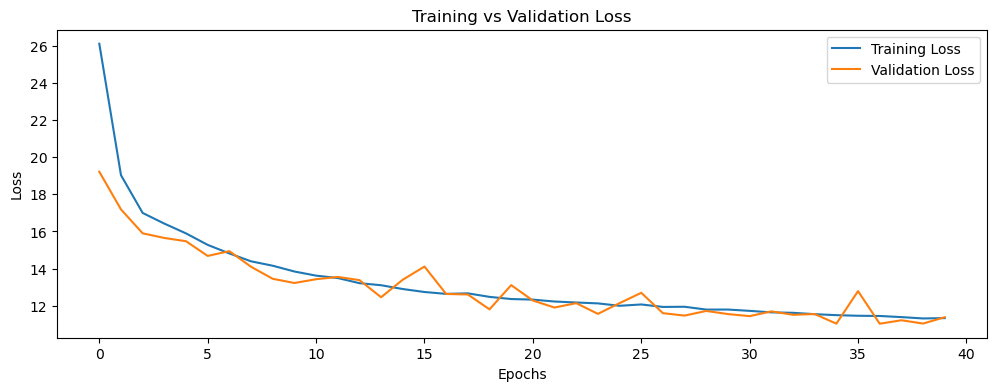

  2%|▎         | 1/40 [00:05<03:25,  5.27s/it]

Epoch 1/40 - Loss: 629.779 - Acc: 0.000
              Val_loss: 293.123 - Val_acc: 0.000


 28%|██▊       | 11/40 [00:55<02:27,  5.09s/it]

Epoch 11/40 - Loss: 176.722 - Acc: 0.000
              Val_loss: 170.678 - Val_acc: 0.000


 52%|█████▎    | 21/40 [01:46<01:34,  4.96s/it]

Epoch 21/40 - Loss: 150.969 - Acc: 0.000
              Val_loss: 139.359 - Val_acc: 0.000


 78%|███████▊  | 31/40 [02:31<00:40,  4.54s/it]

Epoch 31/40 - Loss: 138.290 - Acc: 0.000
              Val_loss: 143.412 - Val_acc: 0.000


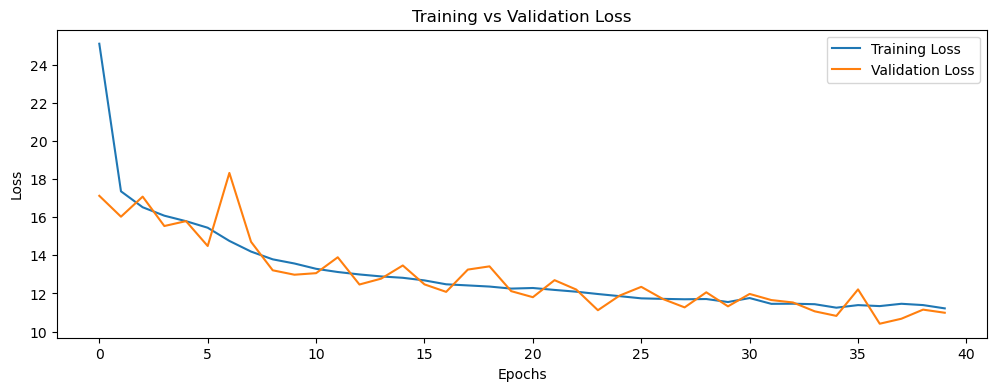

  2%|▎         | 1/40 [00:04<03:08,  4.83s/it]

Epoch 1/40 - Loss: 668.806 - Acc: 0.000
              Val_loss: 368.894 - Val_acc: 0.000


 28%|██▊       | 11/40 [00:54<02:23,  4.95s/it]

Epoch 11/40 - Loss: 179.471 - Acc: 0.000
              Val_loss: 179.314 - Val_acc: 0.000


 52%|█████▎    | 21/40 [01:42<01:31,  4.80s/it]

Epoch 21/40 - Loss: 151.729 - Acc: 0.000
              Val_loss: 147.747 - Val_acc: 0.000


 78%|███████▊  | 31/40 [02:30<00:43,  4.80s/it]

Epoch 31/40 - Loss: 135.604 - Acc: 0.000
              Val_loss: 134.382 - Val_acc: 0.000


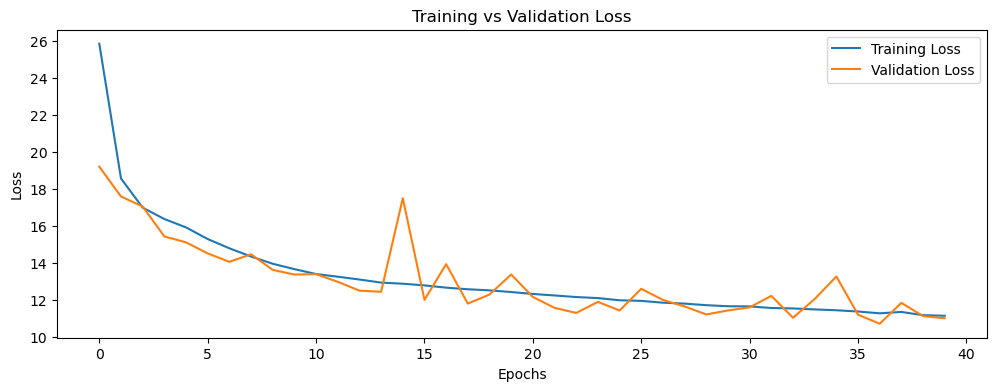

In [28]:
kf = KFold(3, shuffle=True, random_state=49)

for idx, (train_index, val_index) in enumerate(kf.split(mbtr_reps)):
    X_train_fold, X_val_fold = mbtr_reps[train_index], mbtr_reps[val_index]
    y_train_fold, y_val_fold = all_energies_arr[train_index], all_energies_arr[val_index]
    # convert to single NumPy array
    #test_energies = np.concatenate(test_energies)
    # convert tensor types to float
    test_molecules = torch.FloatTensor(test_molecules)
    val_molecules = torch.FloatTensor(val_molecules)
    test_energies = torch.FloatTensor(test_energies).view(-1, 1)
    val_energies = torch.FloatTensor(val_energies).view(-1, 1)

    model1 = ANN1()
    model1.fc4 = nn.Linear(64, 1)
    train_model1 = TrainerOld(model=model1, optimizer_type="Adam", learning_rate=1e-3, epoch=40, batch_size=10)
    model1_results = train_model1.train(test_molecules, test_energies, val_molecules, val_energies, l2=False)

## new trainer

  2%|▎         | 1/40 [02:05<1:21:46, 125.80s/it]

Epoch 1/40 - Loss: 20132015.705 - Acc: 0.000
              Val_loss: 300.089 - Val_acc: 0.000


 28%|██▊       | 11/40 [24:25<1:00:41, 125.56s/it]

Epoch 11/40 - Loss: 6747008.205 - Acc: 0.000
              Val_loss: 170.799 - Val_acc: 0.000


 52%|█████▎    | 21/40 [41:47<29:18, 92.55s/it]   

Epoch 21/40 - Loss: 6092901.388 - Acc: 0.000
              Val_loss: 147.800 - Val_acc: 0.000


 78%|███████▊  | 31/40 [52:49<07:11, 47.97s/it]

Epoch 31/40 - Loss: 5634244.558 - Acc: 0.000
              Val_loss: 130.532 - Val_acc: 0.000


RuntimeError: Can't call numpy() on Tensor that requires grad. Use tensor.detach().numpy() instead.

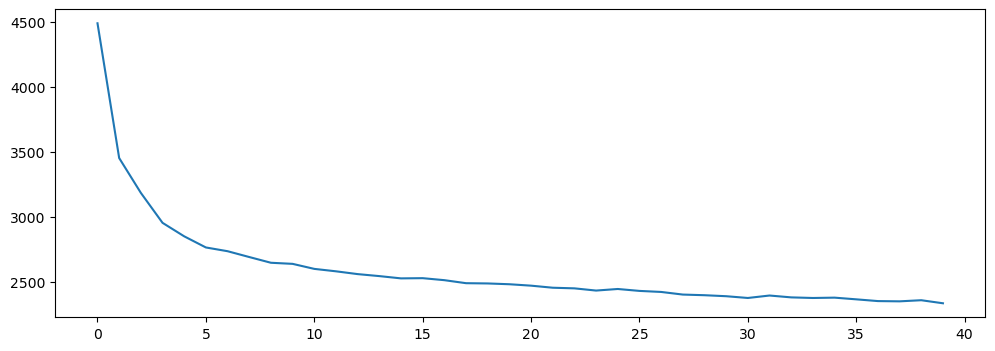

In [36]:
kf = KFold(3, shuffle=True, random_state=49)

for idx, (train_index, val_index) in enumerate(kf.split(mbtr_reps)):
    X_train_fold, X_val_fold = mbtr_reps[train_index], mbtr_reps[val_index]
    y_train_fold, y_val_fold = all_energies_arr[train_index], all_energies_arr[val_index]
    # convert to single NumPy array
    #test_energies = np.concatenate(test_energies)
    # convert tensor types to float
    test_molecules = torch.FloatTensor(test_molecules)
    val_molecules = torch.FloatTensor(val_molecules)
    test_energies = torch.FloatTensor(test_energies).view(-1, 1)
    val_energies = torch.FloatTensor(val_energies).view(-1, 1)

    model1 = ANN1()
    model1.fc4 = nn.Linear(64, 1)
    train_model1 = TrainerNew(model=model1, optimizer_type="Adam", learning_rate=1e-3, epoch=40)
    model1_results = train_model1.train(test_molecules, test_energies, val_molecules, val_energies, l2=False)

### Next we try the ResNet

I added another layer to the resnet (giving it 4 hidden layers total) because I thought the impact of the residual would be better seen with more hidden layers. Does this make my ANN and RNN are less comparable now?

In [153]:
class RNN(nn.Module):
    def __init__(self):
        super(RNN, self).__init__()
        # 768 inputs to 128 node hidden layer
        self.hidden_layer1 = torch.nn.Linear(1000, 128)
        # 128 nodes to 128 nodes
        self.hidden_layer2 = torch.nn.Linear(128, 128)
        # 128 nodes to 128 nodes
        self.hidden_layer3 = torch.nn.Linear(128, 128)
        # 128 nodes to 64 nodes
        self.hidden_layer4 = torch.nn.Linear(128, 64)
        # 64 nodes to 1 output node
        self.output_layer = torch.nn.Linear(64, 1)
        # activation function
        self.activation = F.relu

        self.init_weights()

    # Initialize weights from a normal distribution and biases to zero
    # I am not sure this is the right way to do it!
    def init_weights(self):
        for layer in [self.hidden_layer1, self.hidden_layer2, self.hidden_layer3, self.output_layer]:
            nn.init.normal_(layer.weight, mean=0, std=0.01)
            nn.init.constant_(layer.bias, 0)

    def forward(self, x0):
        x1 = self.activation(self.hidden_layer1(x0))
         # define residual as output of second layer
        res = x1
        x2 = self.activation(self.hidden_layer2(x1))
        x3 = self.activation(self.hidden_layer3(x2))
        # add residual to output from 4th layer
        x3 = x3 + res
        x4 = self.activation(self.hidden_layer4(x3))
        # don't activate output layer
        x5 = self.output_layer(x4)
        
        return x5.float()

  2%|▎         | 1/40 [00:09<05:59,  9.22s/it]

Epoch 1/40 - Loss: 498.413 - Acc: 0.000
              Val_loss: 354.265 - Val_acc: 0.000


 28%|██▊       | 11/40 [01:39<04:30,  9.33s/it]

Epoch 11/40 - Loss: 159.138 - Acc: 0.000
              Val_loss: 144.654 - Val_acc: 0.000


 52%|█████▎    | 21/40 [03:12<02:57,  9.33s/it]

Epoch 21/40 - Loss: 141.951 - Acc: 0.000
              Val_loss: 122.018 - Val_acc: 0.000


 78%|███████▊  | 31/40 [04:43<01:21,  9.03s/it]

Epoch 31/40 - Loss: 134.535 - Acc: 0.000
              Val_loss: 124.102 - Val_acc: 0.000


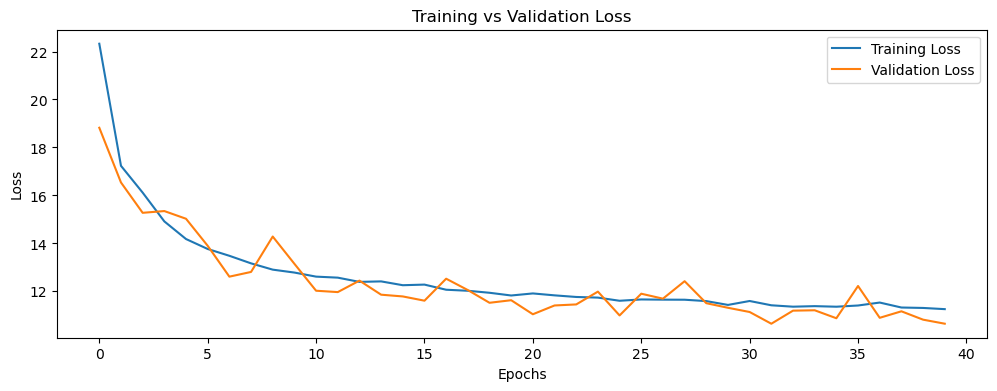

  2%|▎         | 1/40 [00:08<05:19,  8.18s/it]

Epoch 1/40 - Loss: 531.729 - Acc: 0.000
              Val_loss: 339.941 - Val_acc: 0.000


 28%|██▊       | 11/40 [01:28<03:47,  7.84s/it]

Epoch 11/40 - Loss: 161.928 - Acc: 0.000
              Val_loss: 151.581 - Val_acc: 0.000


 52%|█████▎    | 21/40 [02:51<02:40,  8.44s/it]

Epoch 21/40 - Loss: 139.682 - Acc: 0.000
              Val_loss: 152.963 - Val_acc: 0.000


 78%|███████▊  | 31/40 [04:15<01:15,  8.43s/it]

Epoch 31/40 - Loss: 137.202 - Acc: 0.000
              Val_loss: 120.329 - Val_acc: 0.000


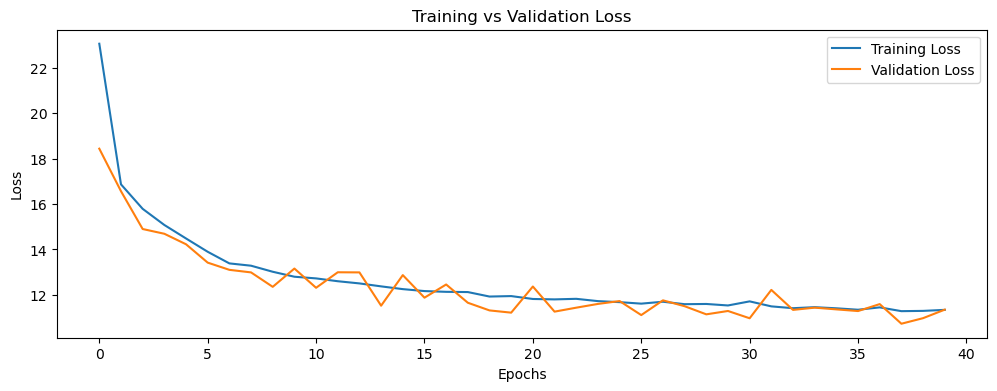

  2%|▎         | 1/40 [00:09<06:04,  9.36s/it]

Epoch 1/40 - Loss: 499.294 - Acc: 0.000
              Val_loss: 299.831 - Val_acc: 0.000


 28%|██▊       | 11/40 [01:32<03:51,  7.98s/it]

Epoch 11/40 - Loss: 158.161 - Acc: 0.000
              Val_loss: 145.964 - Val_acc: 0.000


 52%|█████▎    | 21/40 [02:58<02:44,  8.63s/it]

Epoch 21/40 - Loss: 139.857 - Acc: 0.000
              Val_loss: 119.132 - Val_acc: 0.000


 78%|███████▊  | 31/40 [04:26<01:23,  9.30s/it]

Epoch 31/40 - Loss: 136.912 - Acc: 0.000
              Val_loss: 157.159 - Val_acc: 0.000


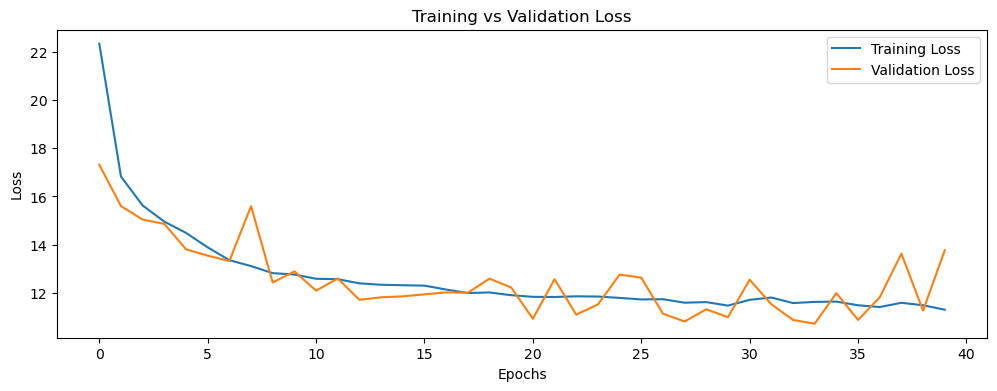

In [155]:
kf = KFold(3, shuffle=True, random_state=49)

for idx, (train_index, val_index) in enumerate(kf.split(mbtr_reps)):
    X_train_fold, X_val_fold = mbtr_reps[train_index], mbtr_reps[val_index]
    y_train_fold, y_val_fold = all_energies[train_index], all_energies[val_index]
    # convert tensor types to float
    test_molecules = torch.FloatTensor(test_molecules)
    val_molecules = torch.FloatTensor(val_molecules)
    test_energies = torch.FloatTensor(test_energies).view(-1, 1)
    val_energies = torch.FloatTensor(val_energies).view(-1, 1)

    model1 = RNN()
    model1.fc4 = nn.Linear(64, 1)
    train_model1 = TrainerOld(model=model1, optimizer_type="Adam", learning_rate=1e-3, epoch=40, batch_size=5)
    model1_results = train_model1.train(test_molecules, test_energies, val_molecules, val_energies, l2=False)

# Below is miscellaneous advice and code that may come in handly later. It is not very well organized and has not been incorporated into my project, so I don't particularly need you to take a look at the things below.

## Ideas for improvement
- try MAE loss
- play with MBTR parameters (use regularization, etc)

# Oliver says

- each input should represent a conformation of a molecule
- atomic environment vector as columns
- Oliver's guess: >20 features for radial and >30 for spherical, ~50 features total.
- radial corresponds to which shell it's on
- spherical corresponds to orbital orientation
- rotational and translational invariance: if conformation2 is generated by rotation or translation of conformation1, both conformations should have the same energy and same input representation.

# Dr. Allgood suggests

- RDkit
- PCA to compact parameters
- genetic algorithm to find optimal hyperparameters for deep learning
    - you're gonna have to tune hyperparameters either way
- can also use autoencoder (more pwerful PCA!)
- for ANN, we can use the architecture in the paper
